# Heart Attack Data Analysis and Prediction

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


# Load the dataset
file_path = 'heart_attack_dataset.csv'
df = pd.read_csv(file_path)
df.tail(10)



,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Treatable
990,Female,85,168,208,Yes,Never,Asymptomatic,Lifestyle Changes,Risk
991,Female,72,194,181,No,Never,Non-anginal Pain,Lifestyle Changes,Not Risky
992,Female,77,90,276,Yes,Never,Non-anginal Pain,Coronary Artery Bypass Graft (CABG),Not Risky
993,Female,77,198,268,Yes,Never,Asymptomatic,Medication,Risk
994,Female,51,107,217,Yes,Former,Non-anginal Pain,Medication,Not Risky
995,Male,42,125,193,Yes,Current,Typical Angina,Angioplasty,Not Risky
996,Male,80,186,267,Yes,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG),Not Risky
997,Female,64,108,174,Yes,Current,Non-anginal Pain,Coronary Artery Bypass Graft (CABG),Not Risky
998,Female,84,123,195,No,Current,Asymptomatic,Lifestyle Changes,Not Risky
999,Male,61,155,197,No,Former,Atypical Angina,Lifestyle Changes,Not Risky


In [2]:

# Displaying basic information about the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
 8   Treatable              1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [3]:
# Check for missing values
df.isna().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
Treatable                0
dtype: int64

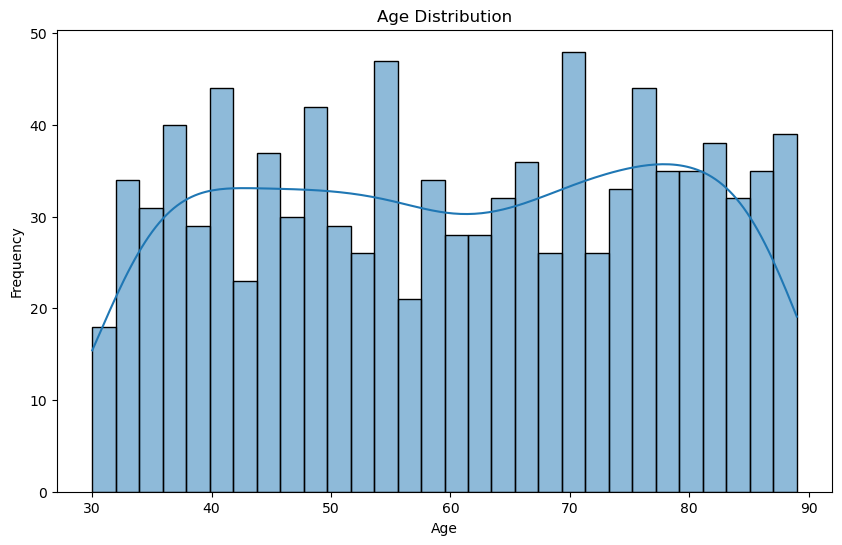

In [4]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



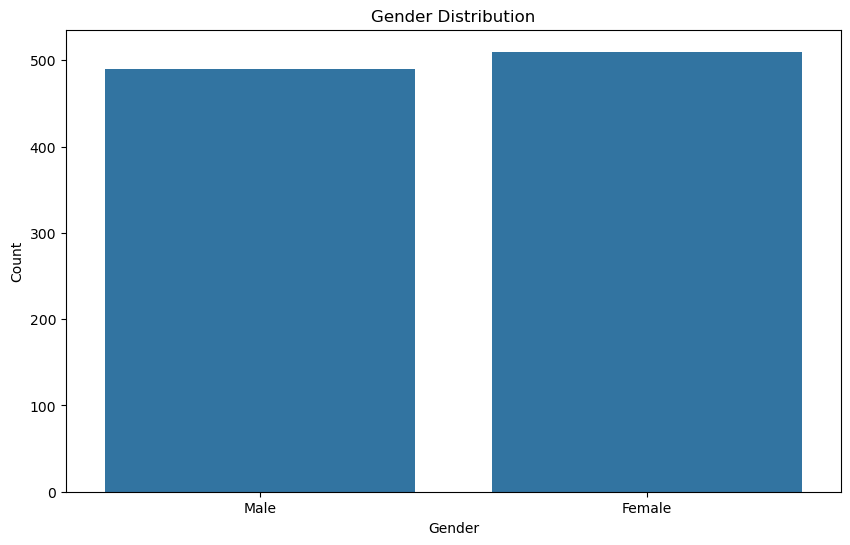

In [5]:
# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


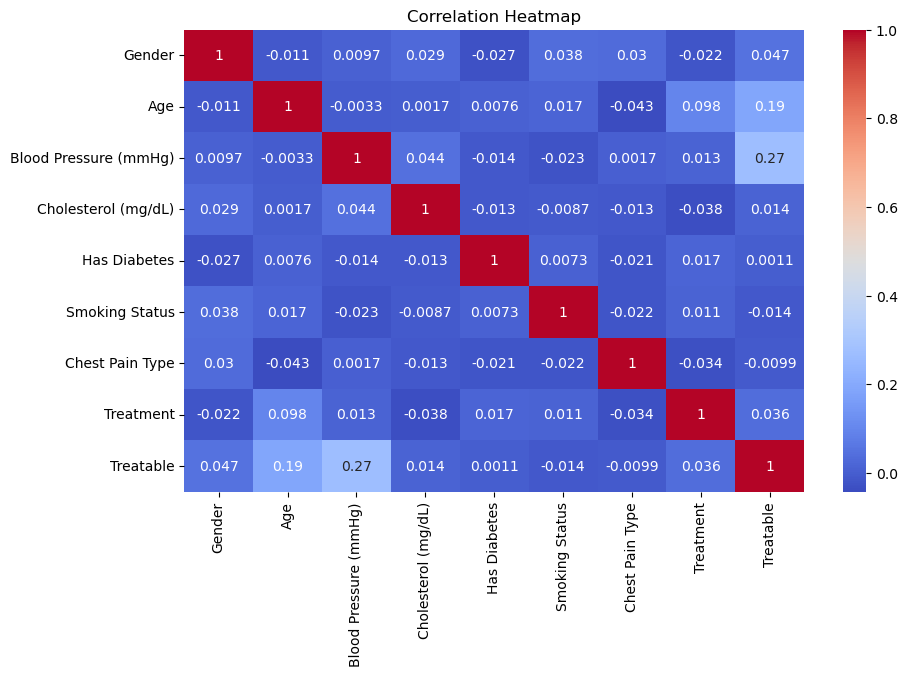

In [13]:
# Correlation heatmap for numeric values
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head(10)


,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Treatable
0,1,70,181,262,1,2,3,2,0
1,0,55,103,253,1,2,1,0,0
2,1,42,95,295,1,0,3,0,0
3,1,84,106,270,0,2,1,1,0
4,1,86,187,296,1,0,2,3,0
5,0,66,125,271,1,1,3,1,0
6,1,33,181,262,1,0,0,2,0
7,1,84,182,288,0,0,2,2,1
8,1,73,115,286,1,2,0,0,0
9,0,63,174,254,1,1,2,0,1


In [8]:
# Define features and target variable
X = df.drop('Treatable', axis=1)
y = df['Treatable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle = True)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (700, 8)
y_train shape:  (700,)
X_test shape:  (300, 8)
y_test shape:  (300,)


In [14]:
print(X) 

     Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL)  Has Diabetes  \
0         1   70                    181                  262             1   
1         0   55                    103                  253             1   
2         1   42                     95                  295             1   
3         1   84                    106                  270             0   
4         1   86                    187                  296             1   
..      ...  ...                    ...                  ...           ...   
995       1   42                    125                  193             1   
996       1   80                    186                  267             1   
997       0   64                    108                  174             1   
998       0   84                    123                  195             0   
999       1   61                    155                  197             0   

     Smoking Status  Chest Pain Type  Treatment  
0            

In [16]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Treatable, Length: 1000, dtype: int32


In [9]:
# Scaling the data for TensorFlow model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the TensorFlow model
nn_model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(len(np.unique(y_train)), activation='softmax')  
])

# Compile the Model
nn_model.compile(optimizer= Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,538 (37.26 KB)

 Trainable params: 9,538 (37.26 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:

# Callbacks for Better Training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Training the Model
nn_history = nn_model.fit(
    X_train_scaled,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)
    

# Evaluating the Model
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Test Loss: {nn_loss}")
print(f"Neural Network Test Accuracy: {nn_accuracy}")

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7865 - loss: 0.6011 - val_accuracy: 0.9433 - val_loss: 0.3228 - learning_rate: 0.0010
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9317 - loss: 0.3421 - val_accuracy: 0.9433 - val_loss: 0.2847 - learning_rate: 0.0010
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9278 - loss: 0.3166 - val_accuracy: 0.9433 - val_loss: 0.2711 - learning_rate: 0.0010
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9201 - loss: 0.3207 - val_accuracy: 0.9433 - val_loss: 0.2593 - learning_rate: 0.0010
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9202 - loss: 0.2920 - val_accuracy: 0.9433 - val_loss: 0.2510 - learning_rate: 0.0010
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9173 - loss: 0.3027 - val_accuracy: 0.9433 - val_loss: 0.2449 - learning_rate: 0.0010
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9200 - loss: 0.2761 - val_accuracy

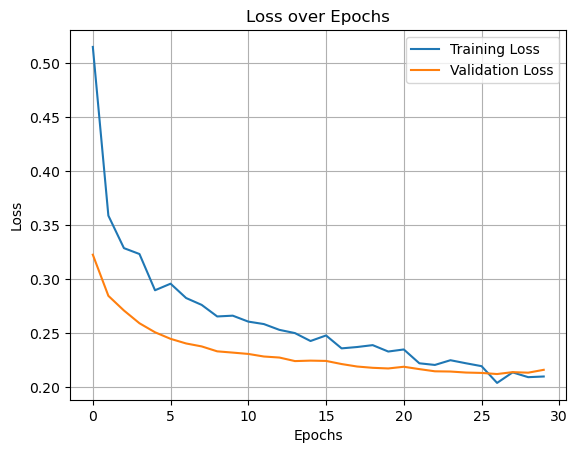

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       283
           1       0.33      0.06      0.10        17

    accuracy                           0.94       300
   macro avg       0.64      0.53      0.53       300
weighted avg       0.91      0.94      0.92       300



In [11]:
# Plot Training and Validation Loss

plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid()
plt.show()


# Making predictions with TensorFlow model
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)


# Evaluating the predictions
print("Classification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn_classes))


##### So the Accuracy of this Tensorflow model is 94%